In [114]:
import pandas as pd

In [115]:
# Nacitanie datasetu s pouzitim Pandas
df = pd.read_csv("zadanie2_dataset.csv")

In [116]:
df.describe()

,ID,Price,Prod. year,Engine volume,Cylinders,Airbags
count,1.923700e+04,1.923700e+04,19237.000000,19237.000000,19237.000000,19237.000000
mean,4.557654e+07,1.855593e+04,2010.912824,2.307990,4.582991,6.582627
std,9.365914e+05,1.905813e+05,5.668673,0.877805,1.199933,4.320168
min,2.074688e+07,1.000000e+00,1939.000000,0.000000,1.000000,0.000000
25%,4.569837e+07,5.331000e+03,2009.000000,1.800000,4.000000,4.000000
50%,4.577231e+07,1.317200e+04,2012.000000,2.000000,4.000000,6.000000
75%,4.580204e+07,2.207500e+04,2015.000000,2.500000,4.000000,12.000000
max,4.581665e+07,2.630750e+07,2020.000000,20.000000,16.000000,16.000000


In [117]:
df.head()

,ID,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Color,Airbags,Turbo engine,Left wheel
0,45654403,13328.0,1399,LEXUS,RX 450,2010,Jeep,Yes,Hybrid,3.5,186005 km,6,Automatic,4x4,4-5,Silver,12,False,True
1,44731507,16621.0,1018,CHEVROLET,Equinox,2011,Jeep,No,Petrol,3.0,192000 km,6,Tiptronic,4x4,4-5,Black,8,False,True
2,45774419,8467.0,-,HONDA,FIT,2006,Hatchback,No,Petrol,1.3,200000 km,4,Variator,Front,4-5,Black,2,False,False
3,45769185,3607.0,862,FORD,Escape,2011,Jeep,Yes,Hybrid,2.5,168966 km,4,Automatic,4x4,4-5,White,0,False,True
4,45809263,11726.0,446,HONDA,FIT,2014,Hatchback,Yes,Petrol,1.3,91901 km,4,Automatic,Front,4-5,Silver,4,False,True


In [118]:
df = df.drop(columns=['ID'])
df = df.drop(columns=['Model'])

In [119]:
df.columns

Index(['Price', 'Levy', 'Manufacturer', 'Prod. year', 'Category',
       'Leather interior', 'Fuel type', 'Engine volume', 'Mileage',
       'Cylinders', 'Gear box type', 'Drive wheels', 'Doors', 'Color',
       'Airbags', 'Turbo engine', 'Left wheel'],
      dtype='object')

In [120]:
df['Price'] = pd.to_numeric(df['Price'], errors='coerce')
df['Levy'] = pd.to_numeric(df['Levy'], errors='coerce')
df['Engine volume'] = pd.to_numeric(df['Engine volume'], errors='coerce')
df['Mileage'] = pd.to_numeric(df['Mileage'].str.replace(' km', '').str.replace(',', ''), errors='coerce')

In [121]:
df.head()

,Price,Levy,Manufacturer,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Color,Airbags,Turbo engine,Left wheel
0,13328.0,1399.0,LEXUS,2010,Jeep,Yes,Hybrid,3.5,186005,6,Automatic,4x4,4-5,Silver,12,False,True
1,16621.0,1018.0,CHEVROLET,2011,Jeep,No,Petrol,3.0,192000,6,Tiptronic,4x4,4-5,Black,8,False,True
2,8467.0,NaN,HONDA,2006,Hatchback,No,Petrol,1.3,200000,4,Variator,Front,4-5,Black,2,False,False
3,3607.0,862.0,FORD,2011,Jeep,Yes,Hybrid,2.5,168966,4,Automatic,4x4,4-5,White,0,False,True
4,11726.0,446.0,HONDA,2014,Hatchback,Yes,Petrol,1.3,91901,4,Automatic,Front,4-5,Silver,4,False,True


In [122]:
print(f'Pocet null hodnot v datasete je: {df.isnull().sum().sum()}')

df = df.dropna()

print(f'Pocet null hodnot po odstraneni v datasete je: {df.isnull().sum().sum()}')

Pocet null hodnot v datasete je: 5819
Pocet null hodnot po odstraneni v datasete je: 0


In [123]:
print(f'Pocet duplikatov v datasete je: {df.duplicated().sum()}')

df = df.drop_duplicates()

print(f'Pocet duplikatov po odstraneni v datasete je: {df.duplicated().sum()}')

Pocet duplikatov v datasete je: 3387
Pocet duplikatov po odstraneni v datasete je: 0


In [124]:
import numpy as np
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

# Label Encoding pre stlpec 'Category'
df['Category'] = le.fit_transform(df['Category'])

# Target Encodingu pre stĺpec 'Manufacturer'
means = df.groupby('Manufacturer')['Price'].mean()
df['Manufacturer'] = df['Manufacturer'].map(means)

# One-Hot Encoding pre stĺpec 'Model'
# top_categories = df['Model'].value_counts().index[:10]  # Vyberieme top 10 hodnôt
# df['Model'] = np.where(df['Model'].isin(top_categories), df['Model'], 'Other')
# df = pd.get_dummies(df, columns=['Model'], prefix='Model', drop_first=True)

# One Hot pre stlpec 'Gear box type'
df = pd.get_dummies(df, columns=['Gear box type'], prefix='GearBox', drop_first=True)

# One Hot pre stlpec 'Drive wheels'
df = pd.get_dummies(df, columns=['Drive wheels'], prefix='DriveWheels', drop_first=True)

# One Hot pre stlpec 'Doors'
df = pd.get_dummies(df, columns=['Doors'], prefix='Doors', drop_first=True)

# one hot stlpec color
df = pd.get_dummies(df, columns=['Color'], prefix='Color', drop_first=True)


# Zakódovanie stĺpca "Fuel type"
df = pd.get_dummies(df, columns=['Fuel type'], prefix='FuelType', drop_first=True)

# Zakódovanie stĺpca "Leather interior"
df['Leather interior'] = df['Leather interior'].map({'Yes': 1, 'No': 0})

# Zakódovanie stĺpca "Turbo engine"
df['Turbo engine'] = df['Turbo engine'].map({True: 1, False: 0})

# Zakódovanie stĺpca "Left wheel"
df['Left wheel'] = df['Left wheel'].map({True: 1, False: 0})

# pretypovanie novych stlpcov
columns = [col for col in df.columns if col.startswith('Color_') or col.startswith('Model_') or col.startswith('GearBox_') or col.startswith('DriveWheels_') or col.startswith('Doors_') or col.startswith('FuelType_')]
df[columns] = df[columns].astype(int)


df.head()

,Price,Levy,Manufacturer,Prod. year,Category,Leather interior,Engine volume,Mileage,Cylinders,Airbags,...,Color_Red,Color_Silver,Color_Sky blue,Color_White,Color_Yellow,FuelType_Diesel,FuelType_Hybrid,FuelType_LPG,FuelType_Petrol,FuelType_Plug-in Hybrid
0,13328.0,1399.0,22134.779456,2010,4,1,3.5,186005,6,12,...,0,1,0,0,0,0,1,0,0,0
1,16621.0,1018.0,15414.667398,2011,4,0,3.0,192000,6,8,...,0,0,0,0,0,0,0,0,1,0
3,3607.0,862.0,18162.088586,2011,4,1,2.5,168966,4,0,...,0,0,0,1,0,0,1,0,0,0
4,11726.0,446.0,20476.212679,2014,3,1,1.3,91901,4,4,...,0,1,0,0,0,0,0,0,1,0
5,39493.0,891.0,23678.930973,2016,4,1,2.0,160931,4,4,...,0,0,0,1,0,1,0,0,0,0


In [125]:
# Odstránenie outlierov
for col in df.columns:
    if df[col].dtype != 'object':
        df = df[(df[col] >= df[col].quantile(0.01)) & (df[col] <= df[col].quantile(0.99))]

In [126]:
df.dtypes

Price                      float64
Levy                       float64
Manufacturer               float64
Prod. year                   int64
Category                     int32
Leather interior             int64
Engine volume              float64
Mileage                      int64
Cylinders                    int64
Airbags                      int64
Turbo engine                 int64
Left wheel                   int64
GearBox_Manual               int32
GearBox_Tiptronic            int32
GearBox_Variator             int32
DriveWheels_Front            int32
DriveWheels_Rear             int32
Doors_4-5                    int32
Doors_>5                     int32
Color_Black                  int32
Color_Blue                   int32
Color_Brown                  int32
Color_Carnelian red          int32
Color_Golden                 int32
Color_Green                  int32
Color_Grey                   int32
Color_Orange                 int32
Color_Pink                   int32
Color_Purple        

In [127]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Rozdelenie dát na trénovaciu a testovaciu množinu
train_data, test_data = train_test_split(df, test_size=0.2, random_state=42)

# Vytvorenie vstupných a výstupných množín
X_train = train_data.drop(columns=['Price'])  # Vstupné množiny (všetky stĺpce okrem 'Price')
y_train = train_data['Price']  # Výstupná množina (stĺpec 'Price')

X_test = test_data.drop(columns=['Price'])
y_test = test_data['Price']

# Normalizácia
scaler = StandardScaler()
X_train_normalized = scaler.fit_transform(X_train)
X_test_normalized = scaler.transform(X_test)

print(f"Počet príznakov pre rozhodovací strom: {X_train_normalized.shape[1]}")
print(f"Počet príznakov pre náhodný les: {X_train_normalized.shape[1]}")
print(f"Počet príznakov pre SVM: {X_train_normalized.shape[1]}")

# Overenie parametrov škálovacieho objektu
# print(scaler.mean_)  # výpis priemeru pre každý príznak
# print(scaler.scale_)  # výpis škály pre každý príznak


Počet príznakov pre rozhodovací strom: 38
Počet príznakov pre náhodný les: 38
Počet príznakov pre SVM: 38


TEST: R2 Score - Decision Tree: 0.41581444683419433
TEST: R2 Score - Random Forest: 0.4527358675228793
TEST: R2 Score - SVM: 0.3263640836712286
TRAIN: R2 Score - Decision Tree: 0.4254738393640376
TRAIN: R2 Score - Random Forest: 0.4548824148925362
TRAIN: R2 Score - SVM: 0.334111147775935


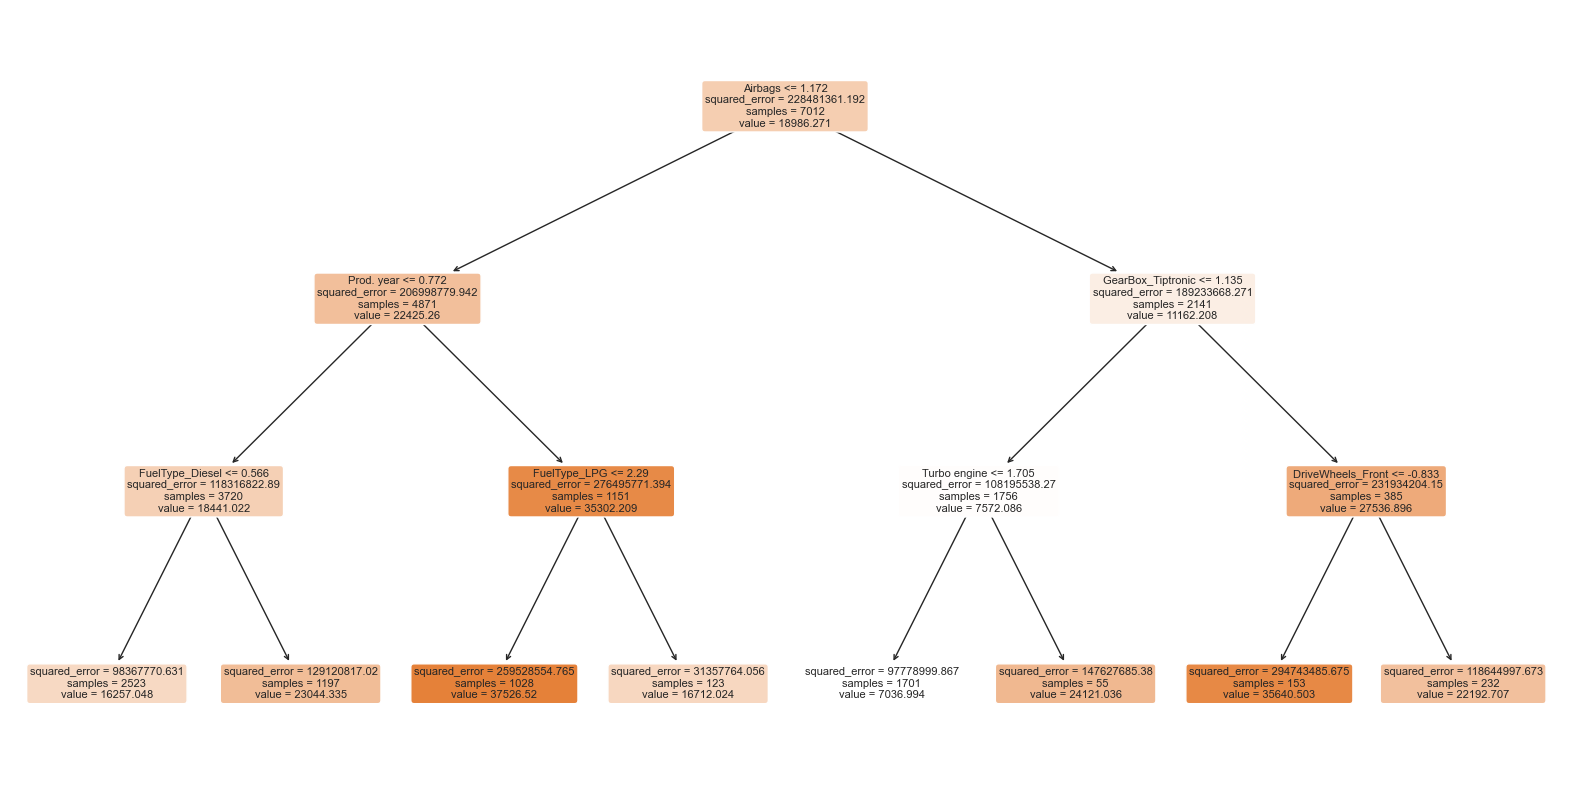

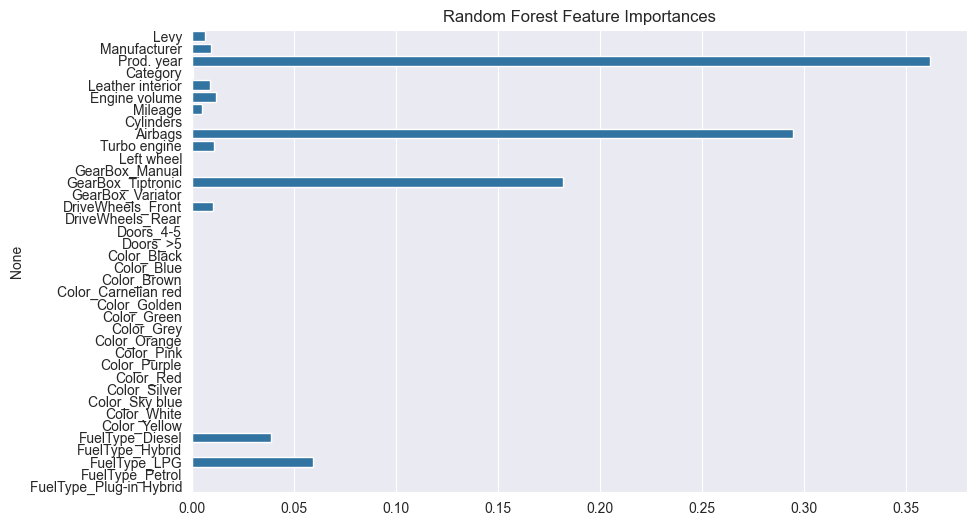

In [136]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import tree
import numpy as np

# Train a Decision Tree
decision_tree = DecisionTreeRegressor(max_depth=3, min_samples_split=2, min_samples_leaf=1)
decision_tree.fit(X_train_normalized, y_train)

# Train a Random Forest (ensemble of trees)
random_forest = RandomForestRegressor(n_estimators=50, max_depth=3, min_samples_split=2, min_samples_leaf=1)
random_forest.fit(X_train_normalized, y_train)

# Train an SVM 
svm_model = SVR(kernel='linear', C=3.0)
svm_model.fit(X_train_normalized, y_train)

# Make predictions TEST
y_pred_tree = decision_tree.predict(X_test_normalized)
y_pred_forest = random_forest.predict(X_test_normalized)
y_pred_svm = svm_model.predict(X_test_normalized)

# Make predictions TRAIN
y_pred_tree_train = decision_tree.predict(X_train_normalized)
y_pred_forest_train = random_forest.predict(X_train_normalized)
y_pred_svm_train = svm_model.predict(X_train_normalized)

# Evaluate models TEST
r2_tree = r2_score(y_test, y_pred_tree)
r2_forest = r2_score(y_test, y_pred_forest)
r2_svm = r2_score(y_test, y_pred_svm)

print(f'TEST: R2 Score - Decision Tree: {r2_tree}')
print(f'TEST: R2 Score - Random Forest: {r2_forest}')
print(f'TEST: R2 Score - SVM: {r2_svm}')

# Evaluate models TRAIN
r2_tree_train = r2_score(y_train, y_pred_tree_train)
r2_forest_train = r2_score(y_train, y_pred_forest_train)
r2_svm_train = r2_score(y_train, y_pred_svm_train)

print(f'TRAIN: R2 Score - Decision Tree: {r2_tree_train}')
print(f'TRAIN: R2 Score - Random Forest: {r2_forest_train}')
print(f'TRAIN: R2 Score - SVM: {r2_svm_train}')

# Visualize a decision tree
plt.figure(figsize=(20, 10))
tree.plot_tree(decision_tree, filled=True, feature_names=X_train.columns, rounded=True, fontsize=8)
plt.show()

# Visualize feature importances in the Random Forest
plt.figure(figsize=(10, 6))
sns.barplot(x=random_forest.feature_importances_, y=X_train.columns)
plt.title('Random Forest Feature Importances')
plt.show()


R2 Score - Random Forest: 0.7642315912904484


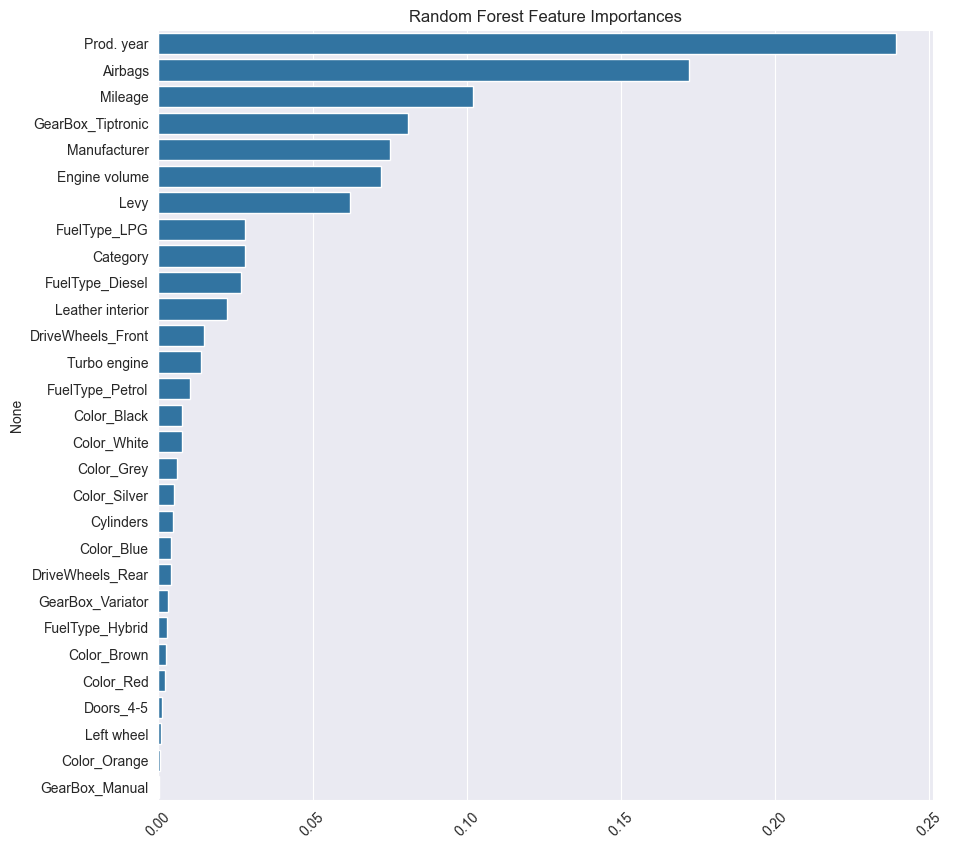

In [137]:
# Train a Random Forest (ensemble of trees)
random_forest = RandomForestRegressor(random_state=42)
random_forest.fit(X_train_normalized, y_train)

# Make predictions
y_pred_forest = random_forest.predict(X_test_normalized)

# Evaluate model
r2_forest = r2_score(y_test, y_pred_forest)

print(f'R2 Score - Random Forest: {r2_forest}')

# Visualize feature importances in the Random Forest
plt.figure(figsize=(10, 10))
feature_importance = random_forest.feature_importances_
sorted_idx = np.argsort(feature_importance)[::-1]

# Filter out features with zero importance
non_zero_features = feature_importance[sorted_idx] > 0
sorted_idx = sorted_idx[non_zero_features]

sns.barplot(x=feature_importance[sorted_idx], y=X_train.columns[sorted_idx])
plt.title('Random Forest Feature Importances')
plt.xticks(rotation=45)
plt.show()


In [138]:
# Vyhodnotenie modelov
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Funkcia pre výpočet RMSE
def rmse(y_true, y_pred):
    return np.sqrt(mean_squared_error(y_true, y_pred))

# Funkcia na vyhodnotenie modelu
def evaluate_model(model, X_train, y_train, X_test, y_test):
    # Predikcia na trénovacej množine
    y_train_pred = model.predict(X_train)
    
    # Predikcia na testovacej množine
    y_test_pred = model.predict(X_test)
    
    # Výpočet metrík
    mse_train = mean_squared_error(y_train, y_train_pred)
    rmse_train = rmse(y_train, y_train_pred)
    r2_train = r2_score(y_train, y_train_pred)
    
    mse_test = mean_squared_error(y_test, y_test_pred)
    rmse_test = rmse(y_test, y_test_pred)
    r2_test = r2_score(y_test, y_test_pred)
    
    # Výpis výsledkov
    print(f"Train MSE: {mse_train}, RMSE: {rmse_train}, R2: {r2_train}")
    print(f"Test MSE: {mse_test}, RMSE: {rmse_test}, R2: {r2_test}")

# Evaluácia pre rozhodovací strom
evaluate_model(decision_tree, X_train_normalized, y_train, X_test_normalized, y_test)

# Evaluácia pre náhodný les
evaluate_model(random_forest, X_train_normalized, y_train, X_test_normalized, y_test)

# Evaluácia pre SVM
evaluate_model(svm_model, X_train_normalized, y_train, X_test_normalized, y_test)


Train MSE: 131268519.22255158, RMSE: 11457.247454015802, R2: 0.4254738393640376
Test MSE: 135114946.40861258, RMSE: 11623.895491986006, R2: 0.41581444683419433
Train MSE: 9353493.120528616, RMSE: 3058.348103229686, R2: 0.9590623363248164
Test MSE: 54530338.40875128, RMSE: 7384.466020556346, R2: 0.7642315912904484
Train MSE: 152143191.35877147, RMSE: 12334.63381534983, R2: 0.334111147775935
Test MSE: 155803717.2272308, RMSE: 12482.135924080894, R2: 0.3263640836712286


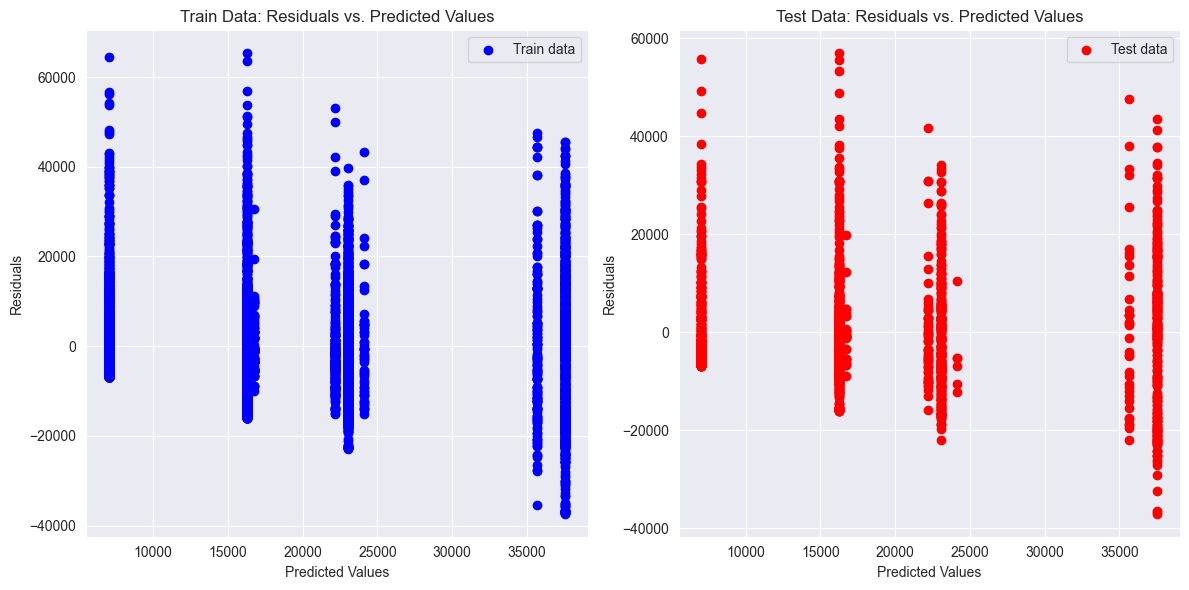

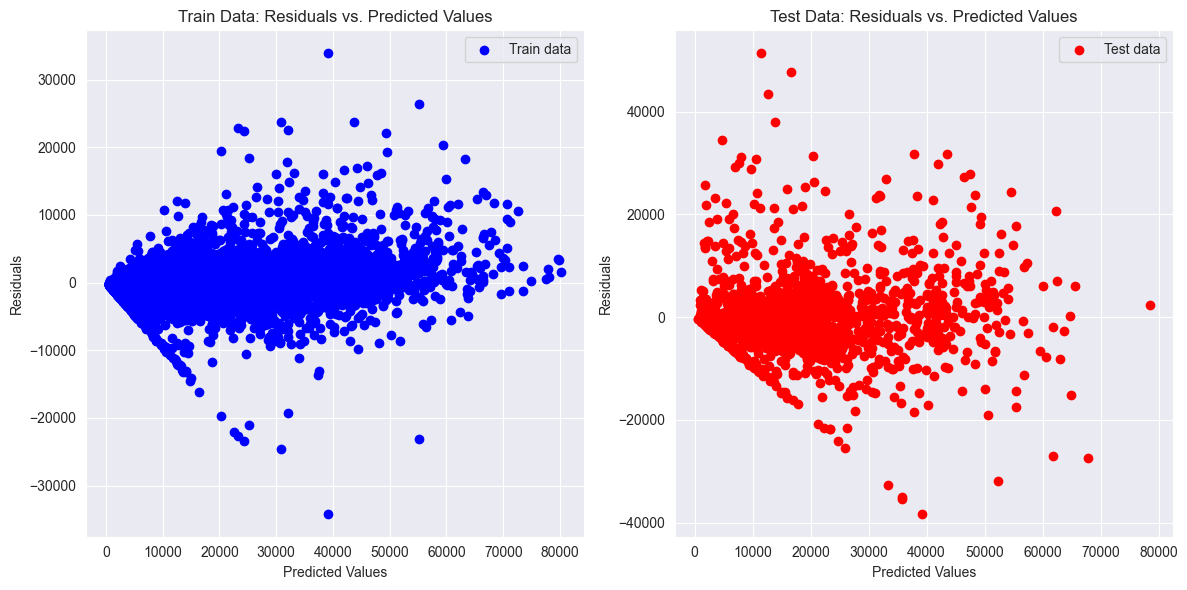

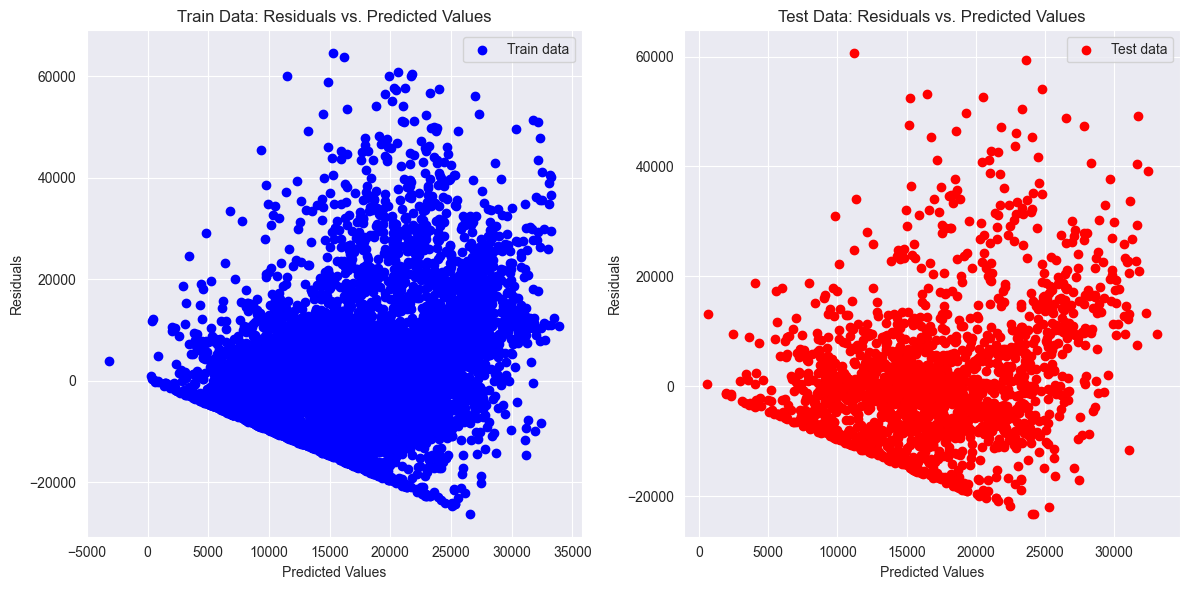

In [139]:
# Vizualizácia reziduálov
# Funkcia na vizualizáciu reziduálov
def plot_residuals(model, X_train, y_train, X_test, y_test):
    # Predikcie
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    # Výpočet reziduálov
    residuals_train = y_train - y_train_pred
    residuals_test = y_test - y_test_pred
    
    # Vizualizácia reziduálov
    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    plt.scatter(y_train_pred, residuals_train, c='blue', marker='o', label='Train data')
    plt.title('Train Data: Residuals vs. Predicted Values')
    plt.xlabel('Predicted Values')
    plt.ylabel('Residuals')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.scatter(y_test_pred, residuals_test, c='red', marker='o', label='Test data')
    plt.title('Test Data: Residuals vs. Predicted Values')
    plt.xlabel('Predicted Values')
    plt.ylabel('Residuals')
    plt.legend()

    plt.tight_layout()
    plt.show()

# Vizualizácia reziduálov pre rozhodovací strom
plot_residuals(decision_tree, X_train_normalized, y_train, X_test_normalized, y_test)

# Vizualizácia reziduálov pre náhodný les
plot_residuals(random_forest, X_train_normalized, y_train, X_test_normalized, y_test)

# Vizualizácia reziduálov pre SVM
plot_residuals(svm_model, X_train_normalized, y_train, X_test_normalized, y_test)
